### Multiple linear regression (MLR) 
- https://archive.ics.uci.edu/ml/datasets/student+performance

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

#### Read CSV file

In [2]:
csv_in = 'student-por-gp.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(423, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        423 non-null    int64 
 1   reason     423 non-null    object
 2   studytime  423 non-null    object
 3   failures   423 non-null    int64 
 4   schoolsup  423 non-null    int64 
 5   higher     423 non-null    int64 
 6   goout      423 non-null    int64 
 7   health     423 non-null    int64 
 8   absences   423 non-null    int64 
 9   G3         423 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 33.2+ KB
None


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences,G3
0,18,course,2 to 5 hours,0,1,1,4,3,4,11
1,17,course,2 to 5 hours,0,0,1,3,3,2,11
2,15,other,2 to 5 hours,0,1,1,2,3,6,12
3,15,home,5 to 10 hours,0,0,1,2,5,0,14
4,16,home,2 to 5 hours,0,0,1,2,5,0,13


#### Separate explanatory variables and objective variable  
説明変数と目的変数を分ける  

In [3]:
X = df.drop(columns='G3')  # explanatory variables, 2D
#X = df.loc[:, 'age':'absences']
y = df['G3']  # objective variable, 1D
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (423, 9)


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences
0,18,course,2 to 5 hours,0,1,1,4,3,4
1,17,course,2 to 5 hours,0,0,1,3,3,2
2,15,other,2 to 5 hours,0,1,1,2,3,6
3,15,home,5 to 10 hours,0,0,1,2,5,0
4,16,home,2 to 5 hours,0,0,1,2,5,0


y: (423,)
0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64


#### Encoding of categorical variables  

##### Assign integers  
整数を割り当てる  

In [4]:
print(X['studytime'].value_counts())

studytime
2 to 5 hours     206
<2 hours         119
5 to 10 hours     71
>10 hours         27
Name: count, dtype: int64


In [5]:
X['studytime'] = X['studytime'].replace(
    {'<2 hours':'1', '2 to 5 hours':'2',
     '5 to 10 hours':'3', '>10 hours':'4',
    }
).astype('int')
print(X.info())
display(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        423 non-null    int64 
 1   reason     423 non-null    object
 2   studytime  423 non-null    int64 
 3   failures   423 non-null    int64 
 4   schoolsup  423 non-null    int64 
 5   higher     423 non-null    int64 
 6   goout      423 non-null    int64 
 7   health     423 non-null    int64 
 8   absences   423 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 29.9+ KB
None


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences
0,18,course,2,0,1,1,4,3,4
1,17,course,2,0,0,1,3,3,2
2,15,other,2,0,1,1,2,3,6
3,15,home,3,0,0,1,2,5,0
4,16,home,2,0,0,1,2,5,0


#### Apply get_dummies()  
ダミー変数化  

In [6]:
print(X['reason'].value_counts())

reason
course        167
home          115
reputation    114
other          27
Name: count, dtype: int64


In [7]:
X_dumm = pd.get_dummies(X, drop_first=True, dtype='uint8')
print('X_dumm:', X_dumm.shape)
display(X_dumm.head())

X_dumm: (423, 11)


,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation
0,18,2,0,1,1,4,3,4,0,0,0
1,17,2,0,0,1,3,3,2,0,0,0
2,15,2,0,1,1,2,3,6,0,1,0
3,15,3,0,0,1,2,5,0,1,0,0
4,16,2,0,0,1,2,5,0,1,0,0


#### MLR calculation without standardization    
標準化なしで線形重回帰分析  

In [8]:
X_dumm_c = sm.add_constant(X_dumm)
model = sm.OLS(y, X_dumm_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     18.82
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.53e-30
Time:                        00:52:08   Log-Likelihood:                -921.75
No. Observations:                 423   AIC:                             1868.
Df Residuals:                     411   BIC:                             1916.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.6330      1.71

#### R2 and Adjusted R2    
決定係数と自由度調整済み決定係数  

In [9]:
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.33500762976006815
Adj R2: 0.31720978043491177


#### Partial regression coefficients  
偏回帰係数  

In [10]:
print(results.params)

const                6.632959
age                  0.284534
studytime            0.330960
failures            -1.266708
schoolsup           -1.453179
higher               2.640919
goout               -0.257661
health              -0.191346
absences            -0.060924
reason_home          0.308610
reason_other         0.221979
reason_reputation    0.604262
dtype: float64


#### MLR calculation with standardization  
全説明変数と目的変数を標準化して線形重回帰分析  

In [11]:
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(y)

In [12]:
# make DataFrames corresponding to X_scaled and y_scaled.
X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
y_scaled = pd.Series(y_scaled_ar, name=y.name)
model = sm.OLS(y_scaled, X_scaled)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              18.87
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    1.26e-30
Time:                        00:52:08   Log-Likelihood:                         -513.92
No. Observations:                 423   AIC:                                      1050.
Df Residuals:                     412   BIC:                                      1094.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Compare standardized partial regression coefficients    
標準化偏回帰係数を比較　　

In [13]:
print(results_scaled.params.sort_values(key=np.abs, ascending=False))

higher               0.266292
failures            -0.266116
schoolsup           -0.187796
age                  0.134906
absences            -0.120470
goout               -0.113137
studytime            0.105909
health              -0.103530
reason_reputation    0.102234
reason_home          0.052357
reason_other         0.020691
dtype: float64


#### Do prediction with obtained model    
得られたモデルを用いて、予測を行う。  

In [14]:
X_test = pd.DataFrame([[18, 4, 0, 0, 1, 1,
                        2, 0, 0, 0, 1],
                       [15, 1, 3, 1, 0, 4,
                        3, 10, 0, 1, 0],
                        ],
                        columns=X_dumm.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,age,studytime,failures,schoolsup,higher,goout,health,absences,reason_home,reason_other,reason_reputation
0,18,4,0,0,1,1,2,0,0,0,1
1,15,1,3,1,0,4,3,10,0,1,0


In [15]:
X_test_c = sm.add_constant(X_test, has_constant='add')
y_test = results.predict(X_test_c)
print('Predicted y:')
print(y_test)

Predicted y:
0    15.683232
1     3.986678
dtype: float64


#### (Adv) Visualization of the fitting of regression formula  

In [16]:
y_pred = results.predict(X_dumm_c)
print('Predicted y:')
print(y_pred.head())

Predicted y:
0    11.755846
1    13.304000
2    11.517699
3    13.371322
4    13.324895
dtype: float64


In [17]:
y_min = np.append(y_pred, y).min()
y_max = np.append(y_pred, y).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

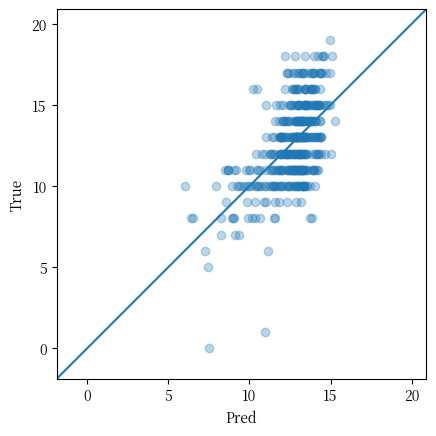

In [18]:
plt.scatter(y_pred, y, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [19]:
mse = mean_squared_error(y, y_pred)
print('MSE, RMSE:', mse, np.sqrt(mse))

MSE, RMSE: 4.573595787773046 2.138596686561785
